# UberProjectNotebook

# Importing Important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset useing pandas
df=pd.read_csv('Dataset_Uber Traffic.csv')
df.sample(10)

,DateTime,Junction,Vehicles,ID
23881,22/11/16 1:00,2,20,20161122012
43614,24/06/17 6:00,3,7,20170624063
41938,15/04/17 10:00,3,12,20170415103
16177,06/01/16 1:00,2,7,20160106012
20971,23/07/16 19:00,2,10,20160723192
1717,11/01/16 13:00,1,32,20160111131
37971,01/11/16 3:00,3,7,20161101033
8172,06/10/16 12:00,1,70,20161006121
47713,14/06/17 1:00,4,6,20170614014
27600,26/04/17 0:00,2,31,20170426002


# Getting information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [5]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

# For Better understanding and prediction we use feature engineering and adding features like 
 -Hours
 -Days of week 
 -Months

In [6]:
# Verify that  datatype of the 'DateTime' column is object or not...
print(df['DateTime'].dtype)

# Add features of date time features
df['DateTime'] = pd.to_datetime(df['DateTime'])  

df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month

object


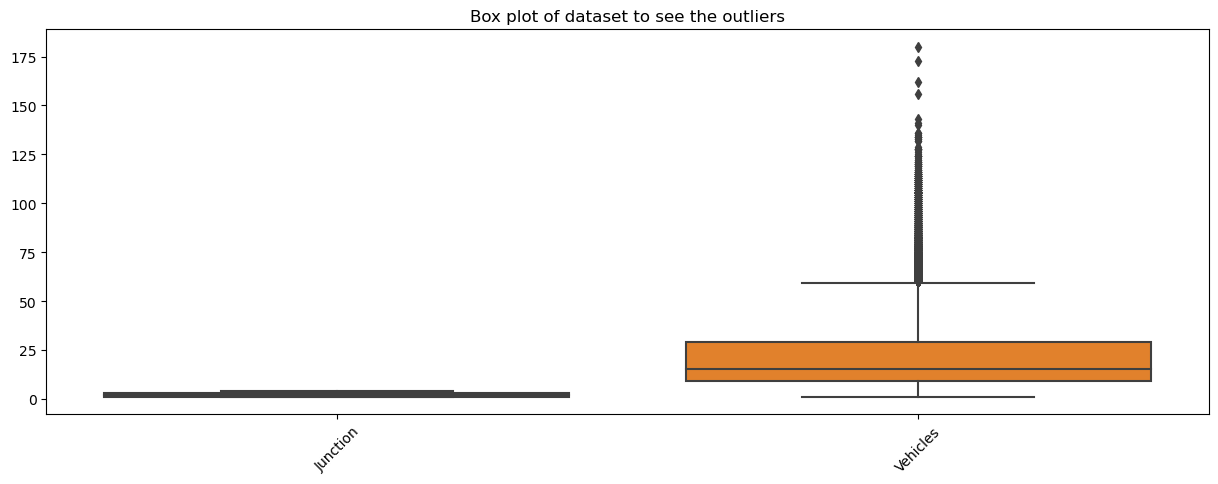

In [7]:
# Check for outliers using box plots
plt.figure(figsize=(15, 5))

sns.boxplot(data=df[['Junction', 'Vehicles']])
plt.title('Box plot of dataset to see the outliers')
plt.xticks(rotation=45)
plt.show()

## Normalization and Standardization of data for EDA

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[['Junction', 'Vehicles', 'Hour', 'DayOfWeek', 'Month']])

# Convert normalized data back to DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=['Junction', 'Vehicles', 'Hour', 'DayOfWeek', 'Month'])

# Define features (X) and target variable (y)
X = df_normalized[['Junction', 'Hour', 'DayOfWeek', 'Month']]
y = df_normalized['Vehicles']

# Spliting  the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split( X , y, test_size= 0.2, random_state = 42)

# shape of training and testing set
print("Training set :", X_train.shape, y_train.shape)
print("Testing set :", X_test.shape, y_test.shape)

Training set : (38496, 4) (38496,)
Testing set : (9624, 4) (9624,)


# Removing Outliers

In [9]:
Q1 = df['Vehicles'].quantile(0.25)
Q3 = df['Vehicles'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5  
mask = (df['Vehicles'] < (Q1-threshold*IQR))|(df['Vehicles']>(Q3+ threshold * IQR))
df_cleaned = df[~mask]


In [10]:
# Again Normalize/Standardize data using MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_cleaned[['Junction', 'Vehicles']])

# Convert normalized data back to DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=['Junction', 'Vehicles'])

## Exploratory Data Analysis

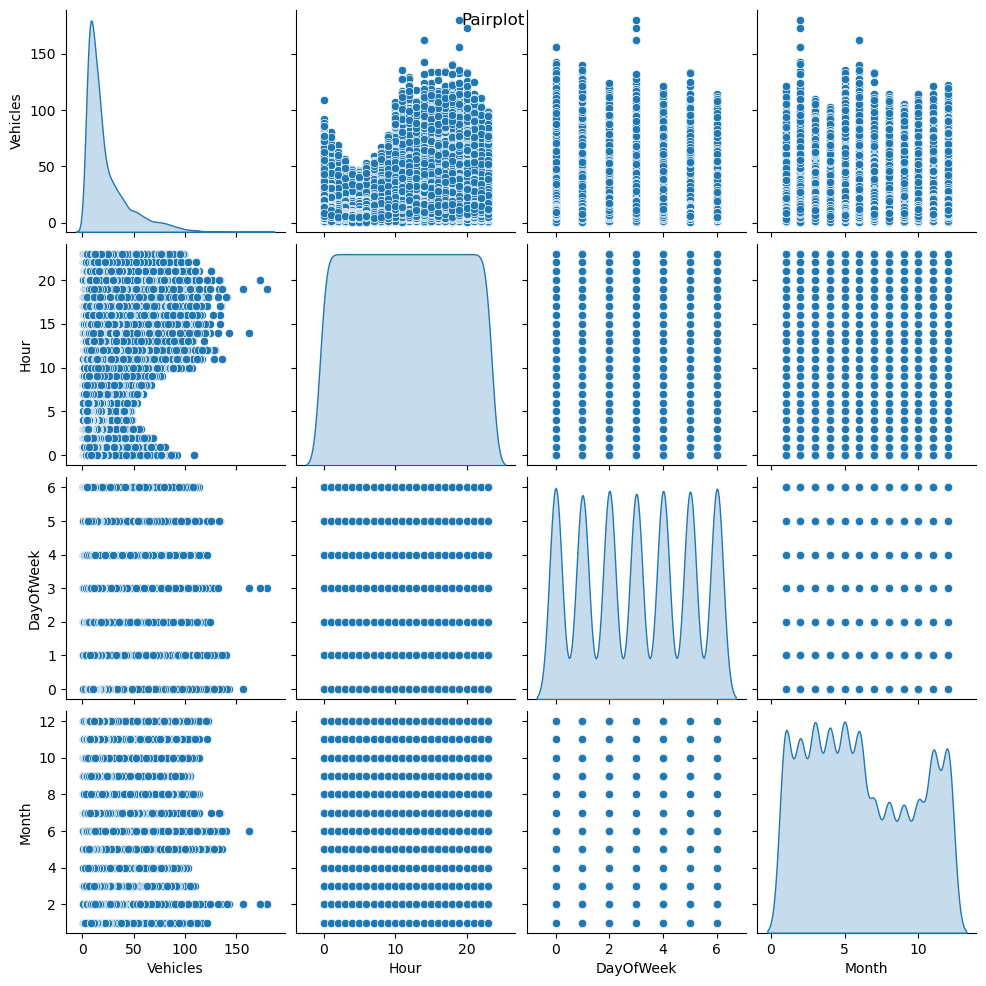

In [11]:
sns.pairplot(df[['Vehicles', 'Hour', 'DayOfWeek', 'Month']], diag_kind='kde')
plt.suptitle('Pairplot')
plt.show()

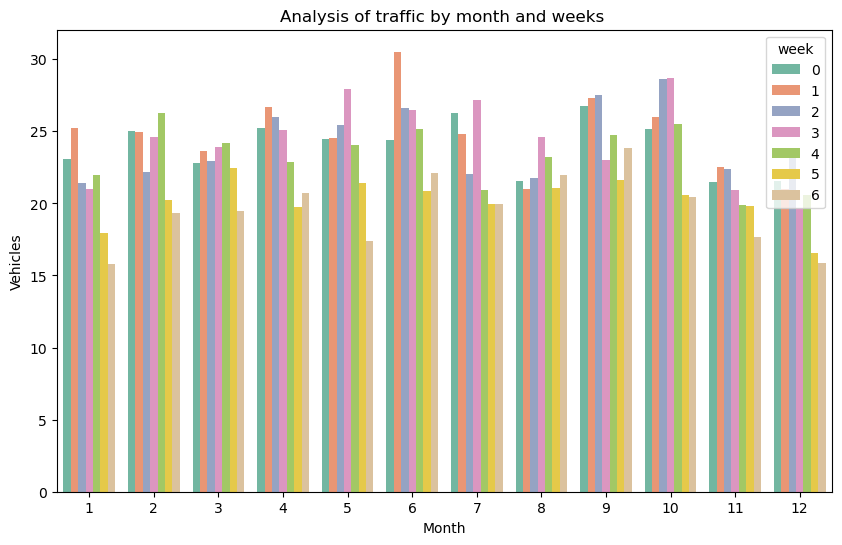

In [12]:
plt.figure(figsize = ( 10 , 6))
sns.barplot(x ='Month', y ='Vehicles', hue ='DayOfWeek', data=df, errorbar=None,palette='Set2')
plt.xlabel('Month')
plt.ylabel('Vehicles')
plt.title('Analysis of traffic by month and weeks ')
plt.legend(title='week', loc='upper right')
plt.show()

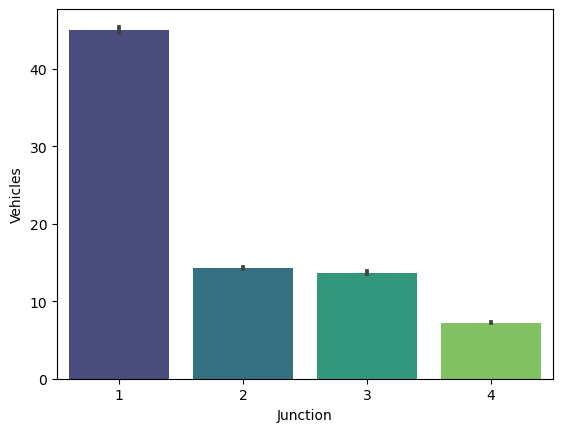

In [13]:
sns.barplot(x=df['Junction'], y=df['Vehicles'], palette='viridis')
plt.show()

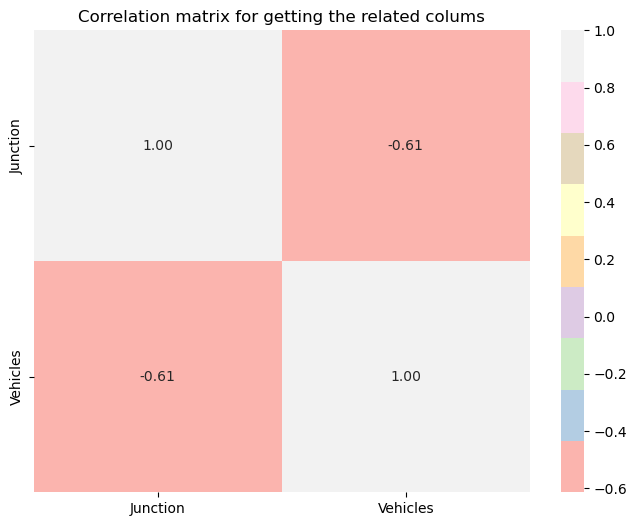

In [14]:
corr_matrix = df[['Junction', 'Vehicles']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation matrix for getting the related colums')
plt.show()

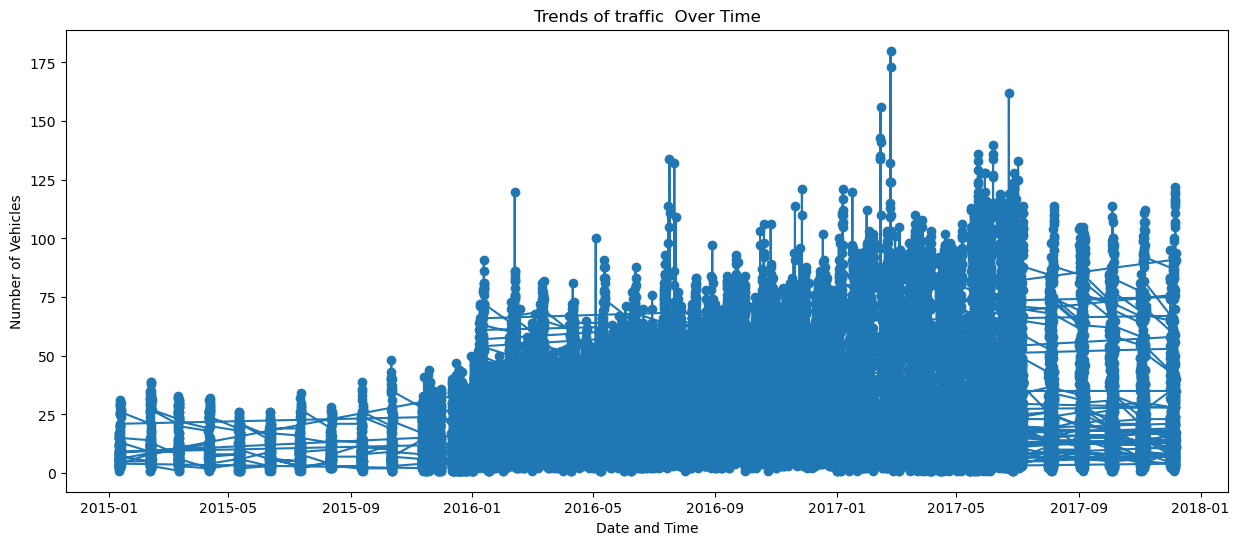

In [15]:
# Time Series Analysis: Visualize traffic trends over time
plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='o', linestyle='-')
plt.title('Trends of traffic  Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Number of Vehicles')
plt.show()

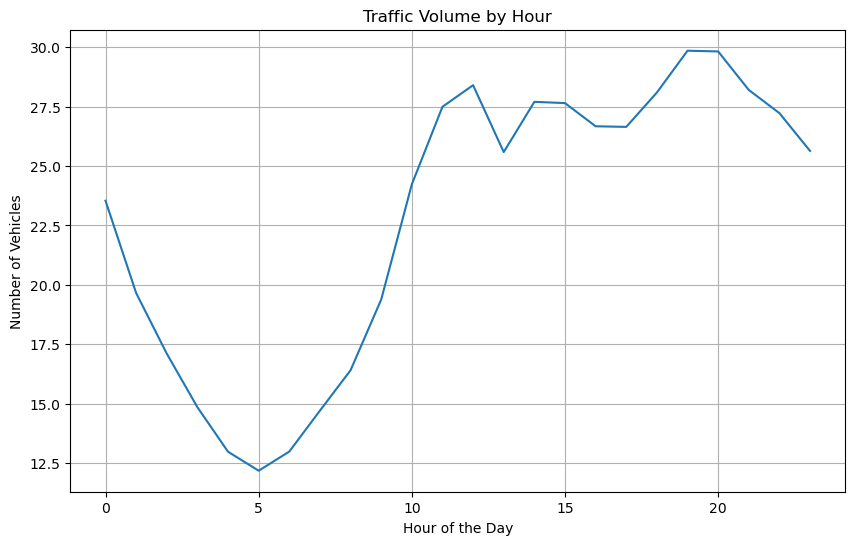

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Hour'], y=df['Vehicles'], errorbar=None)
plt.title('Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

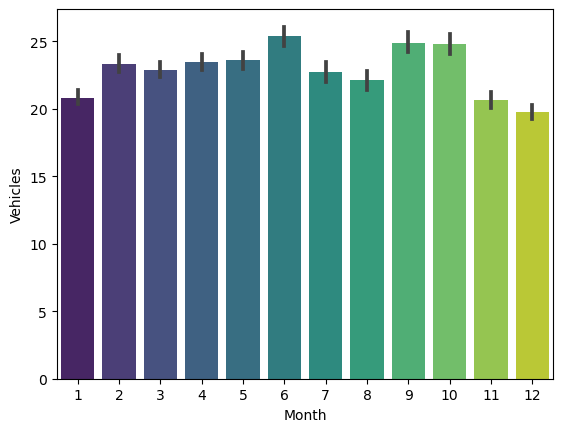

In [17]:
sns.barplot(x=df['Month'], y=df['Vehicles'], palette='viridis')
plt.show()

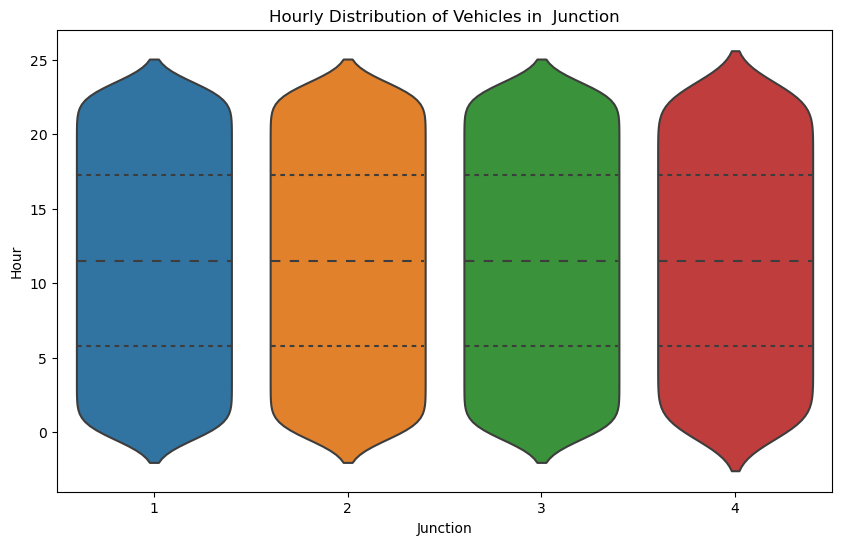

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Junction'], y=df['Hour'], inner='quartile')
plt.xlabel('Junction')
plt.ylabel('Hour')
plt.title('Hourly Distribution of Vehicles in  Junction')
plt.show()

# Finding the peak hours of traffic at all junctions and also finding their average traffic at all junction

Peak Hours (by average number of vehicles):
Hour
19    29.854863
20    29.824938
12    28.403990
21    28.202993
18    28.095262
Name: Vehicles, dtype: float64


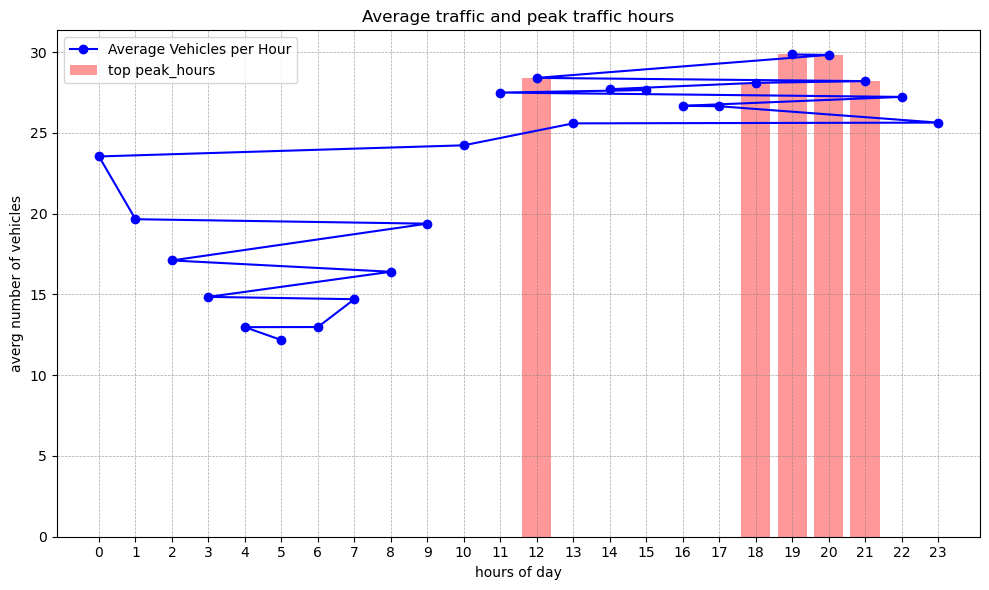

In [19]:

peak_hours = df.groupby("Hour")["Vehicles"].mean().sort_values(ascending=False)

print("Peak Hours (by average number of vehicles):")
print(peak_hours.head())  

plt.figure(figsize=(10, 6))  

plt.plot(peak_hours.index, peak_hours.values, marker='o', linestyle='-', color='b', label='Average Vehicles per Hour')  # Customize plot elements
plt.xlabel("hours of day")
plt.ylabel("averg number of vehicles")
plt.title("Average traffic and peak traffic hours")
plt.xticks(range(24))  
plt.yticks(rotation=0)  
plt.grid(True, linestyle='--', linewidth=0.5, color="gray", which="both", alpha=0.7)  

# Highlight the top 5 peak hours with bars
top_5_hours = peak_hours.head().index
top_5_values = peak_hours.head().values
plt.bar(top_5_hours, top_5_values, alpha=0.4, color="red", label="top peak_hours")

plt.legend()  
plt.tight_layout()  

plt.show()

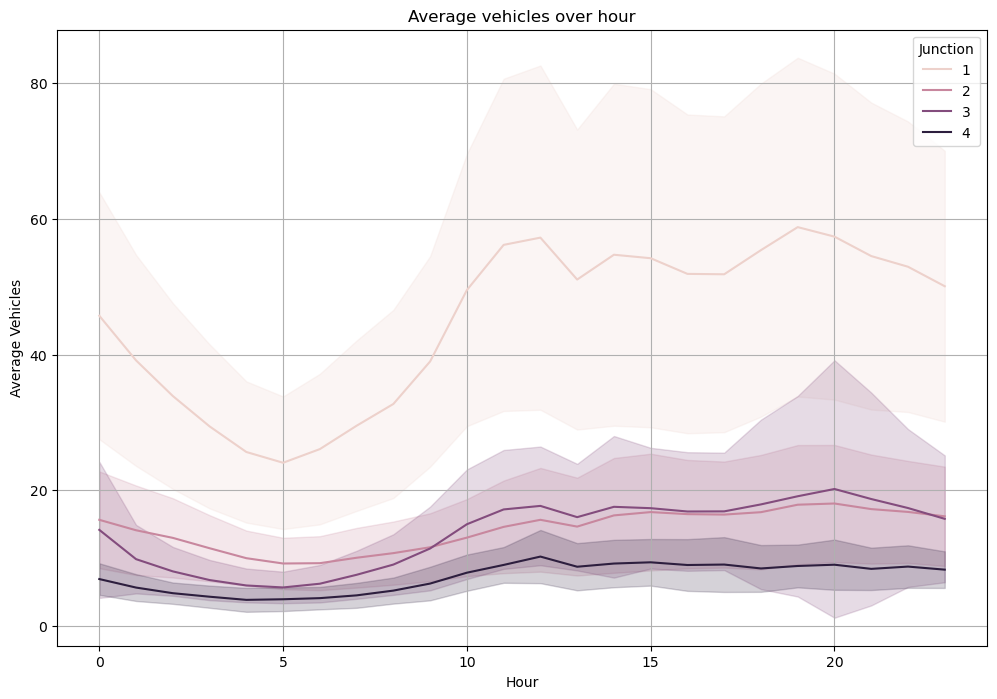

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='Vehicles', hue='Junction', data=df,errorbar='sd')
plt.xlabel('Hour')
plt.ylabel('Average Vehicles')
plt.title('Average vehicles over hour')
plt.legend(title='Junction')
plt.grid(True)
plt.show()

# Next step is to choose and train a model

# Cross-Validation  model

In [21]:
from sklearn.model_selection import KFold, cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a function to create the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Wrap the model using KerasRegressor
keras_model = KerasRegressor(build_fn=create_model, epochs=25, batch_size=32, verbose=0)

# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(keras_model, X, y, cv=kfold, scoring='neg_mean_squared_error')

print("Cross validation RMSE: %.2f " % (np.sqrt(-results.mean()), results.std()))

# Now useing Sequiential model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
963/963 [==============================] - 4s 4ms/step - loss: 0.0060 - mae: 0.0528 - val_loss: 0.0055 - val_mae: 0.0519
Epoch 2/25
963/963 [==============================] - 3s 3ms/step - loss: 0.0052 - mae: 0.0489 - val_loss: 0.0052 - val_mae: 0.0485
Epoch 3/25
963/963 [==============================] - 

# Finding the RMSE score and MSE score

In [23]:
# Predict values using the model
y_pred = model.predict(X_test)

# Squeeze the dimensions if necessary
y_pred = y_pred.squeeze()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

301/301 [==============================] - 1s 1ms/step
Mean Absolute Error (MAE): 0.0465822450244933
Root Mean Squared Error (RMSE): 0.06753048054642635


# Actual vs Predicted Data 

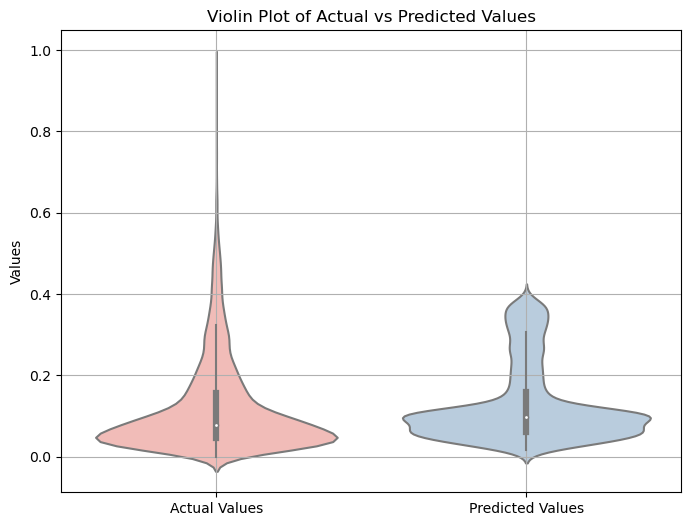

In [24]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=[y_test, y_pred], palette='Pastel1')
plt.xticks([0, 1], ['Actual Values', 'Predicted Values'])
plt.ylabel('Values')
plt.title('Violin Plot of Actual vs Predicted Values')
plt.grid(True)
plt.show()

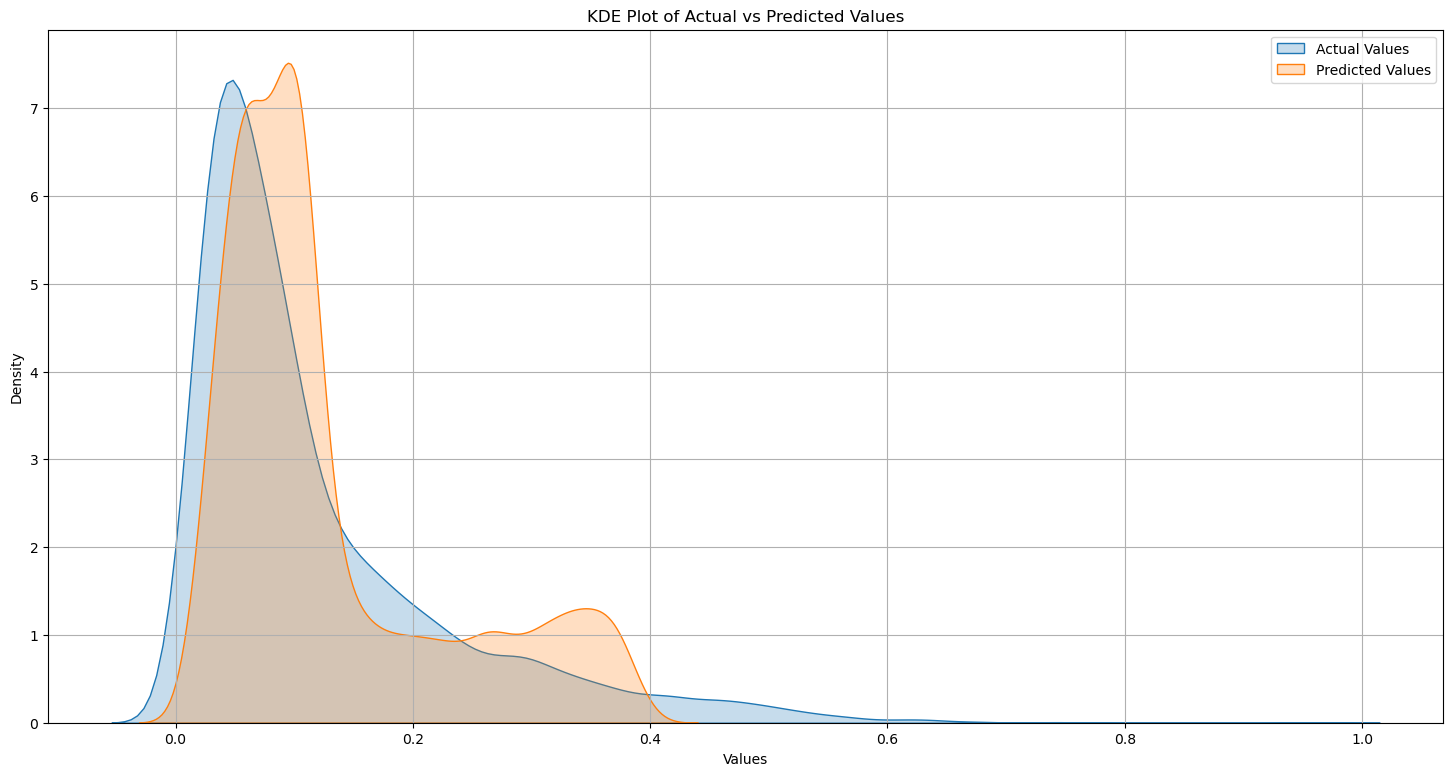

In [25]:
plt.figure(figsize=(18, 9))
sns.kdeplot(y_test, label='Actual Values', fill=True)
sns.kdeplot(y_pred, label='Predicted Values', fill=True)
plt.title('KDE Plot of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()